# Module 5 Assignment Josie Light 

In this assignment, I was given files from class to take a deep dive into any two subjects to compare. I wanted to focus on comparing the job market with Highschool grads and college grads and the rate of unemployment compared to college grads. 

In [2]:
import numpy as np

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 200

# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sb
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# reading in the counties csv file 
counties_df = pd.read_csv('us_counties.csv',dtype={0:'str'})
counties_df.head()

,Unnamed: 0,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
0,01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
1,01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
2,01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
3,01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
4,01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982


In [4]:
# reading in the analytic csv file 
analytic_df = pd.read_csv('analytic_data2021.csv',skiprows=[1],dtype={'5-digit FIPS Code':str})
analytic_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed),Premature death (AIAN),Premature death CI low (AIAN),Premature death CI high (AIAN),Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Asian/Pacific Islander),Premature death CI low (Asian/Pacific Islander),Premature death CI high (Asian/Pacific Islander),Premature death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Black),Premature death CI low (Black),Premature death CI high (Black),Premature death flag (Black) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Hispanic),Premature death CI low (Hispanic),Premature death CI high (Hispanic),Premature death flag (Hispanic) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (White),Premature death CI low (White),Premature death CI high (White),Premature death flag (White) (. = No Flag/1=Unreliable/2=Suppressed),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,LBW unreliable indicator (Unreliable = Numerator < 20 or relative standard error > 20%),Low birthweight (AIAN),Low birthweight CI low (AIAN),Low birthweight CI high (AIAN),Low birthweight (Asian/Pacific Islander),Low birthweight CI low (Asian/Pacific Islander),Low birthweight CI high (Asian/Pacific Islander),Low birthweight (Black),Low birthweight CI low (Black),Low birthweight CI high (Black),Low birthweight (Hispanic),Low birthweight CI low (Hispanic),Low birthweight CI high (Hispanic),Low birthweight (White),Low birthweight CI low (White),Low birthweight CI high (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,...,Firearm fatalities CI high (AIAN),Firearm fatalities (Asian/Pacific Islander),Firearm fatalities CI low (Asian/Pacific Islander),Firearm fatalities CI high (Asian/Pacific Islander),Firearm fatalities (Black),Firearm fatalities CI low (Black),Firearm fatalities CI high (Black),Firearm fatalities (Hispanic),Firearm fatalities CI low (Hispanic),Firearm fatalities CI high (Hispanic),Firearm fatalities (White),Firearm fatalities CI low (White),Firearm fatalities CI high (White),Juvenile arrests raw value,Juvenile arrests numerator,Juvenile arrests denominator,Juvenile arrests CI low,Juvenile arrests CI high,Number of juvenile delinquency cases formally processed by a juvenile court,Number of inf

In [5]:
# creating a merged df to make a correlation between both tables/dataframes
merged_df = pd.merge(
    left = counties_df,
    right = analytic_df,
    left_on = 'Unnamed: 0',
    right_on = '5-digit FIPS Code',
    how = 'inner'
)

merged_df.head()

,Unnamed: 0,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed),Premature death (AIAN),Premature death CI low (AIAN),Premature death CI high (AIAN),Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Asian/Pacific Islander),Premature death CI low (Asian/Pacific Islander),Premature death CI high (Asian/Pacific Islander),Premature death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Black),Premature death CI low (Black),Premature death CI high (Black),Premature death flag (Black) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Hispanic),Premature death CI low (Hispanic),Premature death CI high (Hispanic),Premature death flag (Hispanic) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (White),Premature death CI low (White),Premature death CI high (White),Premature death flag (White) (. = No Flag/1=Unreliable/2=Suppressed),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,LBW unreliable indicator (Unreliable = Numerator < 20 or relative standard error > 20%),Low birthweight (AIAN),Low birthweight CI low (AIAN),Low birthweight CI high (AIAN),Low birthweight (Asian/Pacific Islander),Low birthweight CI low (Asian/Pacific Islander),Low birthweight CI high (Asian/Pacific Islander),Low birthweight (Black),Low birthweight CI low (Black),Low birthweight CI high (Black),Low birthweight (Hispanic),Low birthweight CI low (Hispanic),Low birthweight CI high (Hispanic),...,Firearm fatalities CI high (AIAN),Firearm fatalities (Asian/Pacific Islander),Firearm fatalities CI low (Asian/Pacific Islander),Firearm fatalities CI high (Asian/Pacific Islander),Firearm fatalities (Black),Firearm fatalities CI low (Black),Firearm fatalities CI high (Black),Firearm fatalities (Hispanic),Firearm fatalities CI low (Hispanic),Firearm fatalities CI high (Hispanic),Firearm fatalities (White),Firearm fatalities CI low (White),Firearm fatalities CI high (White),Juvenile arrests raw value,Juvenile arrests numerator,Juvenile arrests denominator,Juvenile arrests CI low,Juvenile arrests CI high,Number of juvenile delinquency cases formally processed by a juvenile court,Number of informally handled juvenile delinquency cases,Traffic volume raw value,Traffic volume numerator,Traffic volume denominator,Traffic volume CI low,Traffic volume CI high,Homeownership raw value,Homeownership numerator,Homeownership denominator,Homeownership CI low,Homeownership CI high,Severe housing cost burden raw value,Severe housing cost burden numerator,Severe housing cost burden denominator,Severe housing cost burden CI low,Severe housing cost burden CI high,Broadband access raw value,Broadband access nume

# Reading in Counties DF

In [25]:
counties_df = pd.read_csv('us_counties.csv',dtype={0:str},na_values=['-'])
counties_df.rename(columns={'Unnamed: 0':'FIPS'},inplace=True)
counties_df.set_index('FIPS',inplace=True)
print(counties_df.shape)
counties_df.head()

(3297, 33)


,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982.0,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756.0,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990.0,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721.0,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922.0,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982


## Replacing % with Pct

In [6]:
# need to get underscores and get rid of the % to use statsmodels 
merged_df.columns = [col.replace(' ','_').replace('%','Pct') for col in merged_df.columns]
merged_df.head()

,Unnamed:_0,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_numerator,Premature_death_denominator,Premature_death_CI_low,Premature_death_CI_high,Premature_death_flag_(0_=_No_Flag/1=Unreliable/2=Suppressed),Premature_death_(AIAN),Premature_death_CI_low_(AIAN),Premature_death_CI_high_(AIAN),Premature_death_flag_(AIAN)_(._=_No_Flag/1=Unreliable/2=Suppressed),Premature_death_(Asian/Pacific_Islander),Premature_death_CI_low_(Asian/Pacific_Islander),Premature_death_CI_high_(Asian/Pacific_Islander),Premature_death_flag_(Asian/Pacific_Islander)_(._=_No_Flag/1=Unreliable/2=Suppressed),Premature_death_(Black),Premature_death_CI_low_(Black),Premature_death_CI_high_(Black),Premature_death_flag_(Black)_(._=_No_Flag/1=Unreliable/2=Suppressed),Premature_death_(Hispanic),Premature_death_CI_low_(Hispanic),Premature_death_CI_high_(Hispanic),Premature_death_flag_(Hispanic)_(._=_No_Flag/1=Unreliable/2=Suppressed),Premature_death_(White),Premature_death_CI_low_(White),Premature_death_CI_high_(White),Premature_death_flag_(White)_(._=_No_Flag/1=Unreliable/2=Suppressed),Poor_or_fair_health_raw_value,Poor_or_fair_health_numerator,Poor_or_fair_health_denominator,Poor_or_fair_health_CI_low,Poor_or_fair_health_CI_high,Poor_physical_health_days_raw_value,Poor_physical_health_days_numerator,Poor_physical_health_days_denominator,Poor_physical_health_days_CI_low,Poor_physical_health_days_CI_high,Poor_mental_health_days_raw_value,Poor_mental_health_days_numerator,Poor_mental_health_days_denominator,Poor_mental_health_days_CI_low,Poor_mental_health_days_CI_high,Low_birthweight_raw_value,Low_birthweight_numerator,Low_birthweight_denominator,Low_birthweight_CI_low,Low_birthweight_CI_high,LBW_unreliable_indicator_(Unreliable_=_Numerator_<_20_or_relative_standard_error_>_20Pct),Low_birthweight_(AIAN),Low_birthweight_CI_low_(AIAN),Low_birthweight_CI_high_(AIAN),Low_birthweight_(Asian/Pacific_Islander),Low_birthweight_CI_low_(Asian/Pacific_Islander),Low_birthweight_CI_high_(Asian/Pacific_Islander),Low_birthweight_(Black),Low_birthweight_CI_low_(Black),Low_birthweight_CI_high_(Black),Low_birthweight_(Hispanic),Low_birthweight_CI_low_(Hispanic),Low_birthweight_CI_high_(Hispanic),...,Firearm_fatalities_CI_high_(AIAN),Firearm_fatalities_(Asian/Pacific_Islander),Firearm_fatalities_CI_low_(Asian/Pacific_Islander),Firearm_fatalities_CI_high_(Asian/Pacific_Islander),Firearm_fatalities_(Black),Firearm_fatalities_CI_low_(Black),Firearm_fatalities_CI_high_(Black),Firearm_fatalities_(Hispanic),Firearm_fatalities_CI_low_(Hispanic),Firearm_fatalities_CI_high_(Hispanic),Firearm_fatalities_(White),Firearm_fatalities_CI_low_(White),Firearm_fatalities_CI_high_(White),Juvenile_arrests_raw_value,Juvenile_arrests_numerator,Juvenile_arrests_denominator,Juvenile_arrests_CI_low,Juvenile_arrests_CI_high,Number_of_juvenile_delinquency_cases_formally_processed_by_a_juvenile_court,Number_of_informally_handled_juvenile_delinquency_cases,Traffic_volume_raw_value,Traffic_volume_numerator,Traffic_volume_denominator,Traffic_volume_CI_low,Traffic_volume_CI_high,Homeownership_raw_value,Homeownership_numerator,Homeownership_denominator,Homeownership_CI_low,Homeownership_CI_high,Severe_housing_cost_burden_raw_value,Severe_housing_cost_burden_numerator,Severe_housing_cost_burden_denominator,Severe_housing_cost_burden_CI_low,Severe_housing_cost_burden_CI_high,Broadband_access_raw_value,Broadband_access_nu

# Looking just at the state of California 

In [26]:
ca_df = counties_df[counties_df['state'] == 'California']
ca_df

,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
06001,14.7,17.7,3.0,California,Alameda,267675.0,1815.0,26.0,17.0,48.7,3.6,9.2,87.2,49.2,23.9,24.0,54.3,91.1,0.1,4.7,104888.0,6.2,95.7,5.8,1661584.0,20.6,13.9,50.8,44.4,22.2,82.6,0.161096,0.001092
06003,36.0,32.9,-3.1,California,Alpine,123.0,0.0,17.9,28.7,38.4,8.4,15.7,87.3,52.9,30.1,63.0,84.7,86.6,0.0,10.0,85750.0,6.0,92.4,5.8,1159.0,21.7,29.1,46.6,66.3,15.8,97.8,0.106126,0.000000
06005,59.1,60.9,1.8,California,Amador,9100.0,85.0,26.1,30.0,18.1,10.8,17.9,87.3,72.5,7.1,49.1,90.6,83.6,0.1,5.6,65187.0,6.5,94.9,5.3,39023.0,15.3,27.0,46.0,91.6,14.3,97.3,0.233196,0.002178
06007,47.2,47.7,0.5,California,Butte,39483.0,385.0,28.3,22.6,28.3,8.0,17.0,82.1,71.9,15.9,48.6,84.5,87.7,0.1,7.4,54972.0,12.0,94.0,10.8,223344.0,20.1,18.2,50.6,86.5,16.8,95.7,0.176781,0.001724
06009,58.4,60.8,2.4,California,Calaveras,7607.0,119.0,18.9,29.0,19.8,10.7,20.1,88.5,75.8,11.0,28.8,91.8,84.1,0.1,5.2,67054.0,7.2,94.7,7.2,45828.0,16.6,28.0,50.0,93.7,12.5,97.8,0.165990,0.002597
06011,53.5,57.3,3.8,California,Colusa,4524.0,21.0,25.4,28.5,14.9,5.1,13.4,89.7,63.5,10.3,93.9,48.6,80.4,0.0,4.2,59427.0,16.1,91.5,9.5,21491.0,27.3,14.6,48.8,89.5,59.7,81.0,0.210507,0.000977
06013,24.9,26.3,1.4,California,Contra Costa,200341.0,1276.0,25.0,17.2,43.3,5.1,11.2,88.1,56.2,18.7,38.3,64.7,93.2,0.1,5.5,103997.0,6.1,95.0,5.8,1147788.0,22.7,15.8,51.1,60.9,25.8,87.2,0.174545,0.001112
06015,53.7,56.4,2.7,California,Del Norte,6170.0,48.0,30.2,31.7,15.4,8.3,18.5,85.6,65.8,14.4,48.3,87.8,83.5,0.0,6.4,49981.0,18.7,94.5,11.1,27692.0,21.7,17.8,46.8,79.7,20.0,94.6,0.222808,0.001733
06017,52.6,53.2,0.6,California,El Dorado,29821.0,199.0,20.4,21.1,35.2,8.9,13.1,85.8,65.2,15.2,28.1,88.3,88.9,0.2,4.7,83710.0,5.6,95.7,5.6,190345.0,19.9,21.2,50.2,90.8,13.0,95.5,0.156668,0.001045


# Looking at how Highschool Graduates affect if someone graduates from college or not

In [27]:
sm_reg = smf.ols('Pct_HS_Grad ~ Pct_College_Grad',
                 data=ca_df).fit()
print(sm_reg.summary())


                            OLS Regression Results                            
Dep. Variable:            Pct_HS_Grad   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     164.2
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           2.74e-18
Time:                        15:38:07   Log-Likelihood:                -141.55
No. Observations:                  58   AIC:                             287.1
Df Residuals:                      56   BIC:                             291.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.5272      0.942  

In [28]:
from scipy.stats import linregress

linregress(
    x = ca_df['Pct_HS_Grad'].fillna(0), 
    y = ca_df['Pct_College_Grad'].fillna(0)
)

LinregressResult(slope=-1.8885571464536413, intercept=72.35027119266266, rvalue=-0.8635273919028807, pvalue=2.7402371639316535e-18, stderr=0.1473841004316134, intercept_stderr=3.548223862678509)

In [29]:
from sklearn.linear_model import LinearRegression

X = ca_df['Pct_HS_Grad'].fillna(0).values.reshape(-1,1)
y = ca_df['Pct_College_Grad'].fillna(0).values.reshape(-1,1)

sk_reg = LinearRegression().fit(X,y)

sk_reg.coef_, sk_reg.intercept_, sk_reg.score(X,y)

(array([[-1.88855715]]), array([72.35027119]), 0.7456795565665915)

<IPython.core.display.Javascript object>


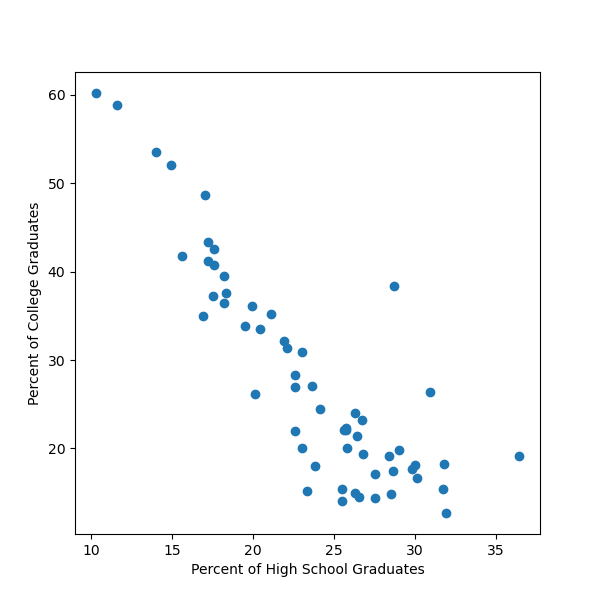

Text(0, 0.5, 'Percent of College Graduates')

In [30]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the pandas Series to the x and y arguments
ax.scatter(
    x = ca_df['Pct_HS_Grad'],
    y = ca_df['Pct_College_Grad']
)

ax.set_xlabel('Percent of High School Graduates')
ax.set_ylabel('Percent of College Graduates')

# Looking at the correlation between High School Graudates and unemployment

In [31]:
sm_reg = smf.ols('Pct_HS_Grad ~ Pct_Unemployed',
                 data=ca_df).fit()
print(sm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Pct_HS_Grad   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     18.64
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           6.50e-05
Time:                        15:38:56   Log-Likelihood:                -172.92
No. Observations:                  58   AIC:                             349.8
Df Residuals:                      56   BIC:                             354.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.8264      2.094      7.

In [33]:
from scipy.stats import linregress

linregress(
    x = ca_df['Pct_HS_Grad'].fillna(0), 
    y = ca_df['Pct_Unemployed'].fillna(0)
)

LinregressResult(slope=0.19443436433943148, intercept=2.146644285403635, rvalue=0.49972890432035705, pvalue=6.502452355016133e-05, stderr=0.0450353588694194, intercept_stderr=1.0842114891416643)

In [35]:
from sklearn.linear_model import LinearRegression

X = ca_df['Pct_HS_Grad'].fillna(0).values.reshape(-1,1)
y = ca_df['Pct_Unemployed'].fillna(0).values.reshape(-1,1)

sk_reg = LinearRegression().fit(X,y)

sk_reg.coef_, sk_reg.intercept_, sk_reg.score(X,y)

(array([[0.19443436]]), array([2.14664429]), 0.24972897781322434)

<IPython.core.display.Javascript object>


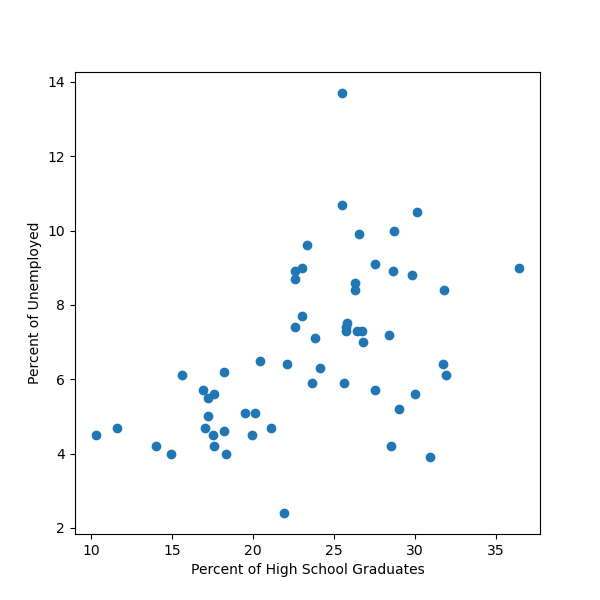

Text(0, 0.5, 'Percent of Unemployed')

In [37]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the pandas Series to the x and y arguments
ax.scatter(
    x = ca_df['Pct_HS_Grad'],
    y = ca_df['Pct_Unemployed']
)

ax.set_xlabel('Percent of High School Graduates')
ax.set_ylabel('Percent of Unemployed')

# Looking at the correlation between College Graduates and unemployment

In [38]:
sm_reg = smf.ols('Pct_College_Grad ~ Pct_Unemployed',
                 data=ca_df).fit()
print(sm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:       Pct_College_Grad   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     27.56
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           2.44e-06
Time:                        15:39:29   Log-Likelihood:                -215.04
No. Observations:                  58   AIC:                             434.1
Df Residuals:                      56   BIC:                             438.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         49.7283      4.328     11.

In [39]:
from scipy.stats import linregress

model = linregress(
    x = ca_df['Pct_College_Grad'].fillna(0), 
    y = ca_df['Pct_Unemployed'].fillna(0)
)

model

LinregressResult(slope=-0.10216447364053813, intercept=9.573213111295944, rvalue=-0.5742689821186673, pvalue=2.436036512020236e-06, stderr=0.01946245604490927, intercept_stderr=0.5948380477279819)

In [40]:
from sklearn.linear_model import LinearRegression

X = ca_df['Pct_College_Grad'].fillna(0).values.reshape(-1,1)
y = ca_df['Pct_Unemployed'].fillna(0).values.reshape(-1,1)

sk_reg = LinearRegression().fit(X,y)

sk_reg.coef_, sk_reg.intercept_, sk_reg.score(X,y)

(array([[-0.10216447]]), array([9.57321311]), 0.32978486382360994)

<IPython.core.display.Javascript object>


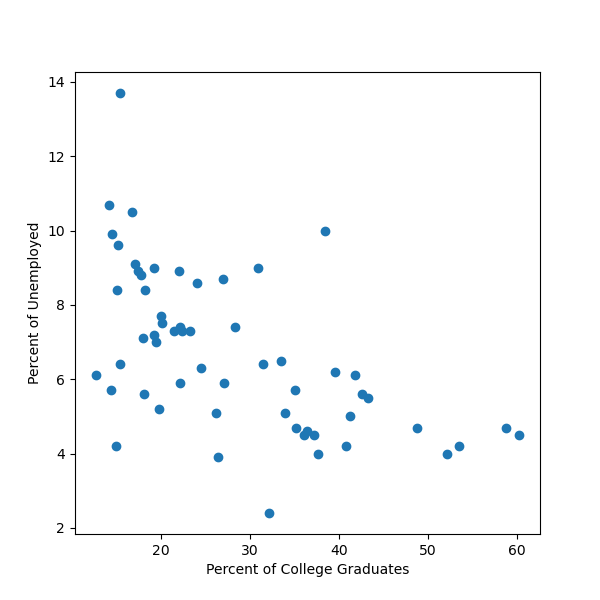

Text(0, 0.5, 'Percent of Unemployed')

In [41]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the pandas Series to the x and y arguments
ax.scatter(
    x = ca_df['Pct_College_Grad'],
    y = ca_df['Pct_Unemployed']
)

ax.set_xlabel('Percent of College Graduates')
ax.set_ylabel('Percent of Unemployed')

In [42]:
from sklearn.linear_model import LinearRegression

X = ca_df['Pct_College_Grad'].fillna(0).values.reshape(-1,1)
y = ca_df['Median_Income'].fillna(0).values.reshape(-1,1)

sk_reg = LinearRegression().fit(X,y)

sk_reg.coef_, sk_reg.intercept_, sk_reg.score(X,y)

(array([[1531.14893728]]), array([28100.01985131]), 0.758593992451154)

<IPython.core.display.Javascript object>


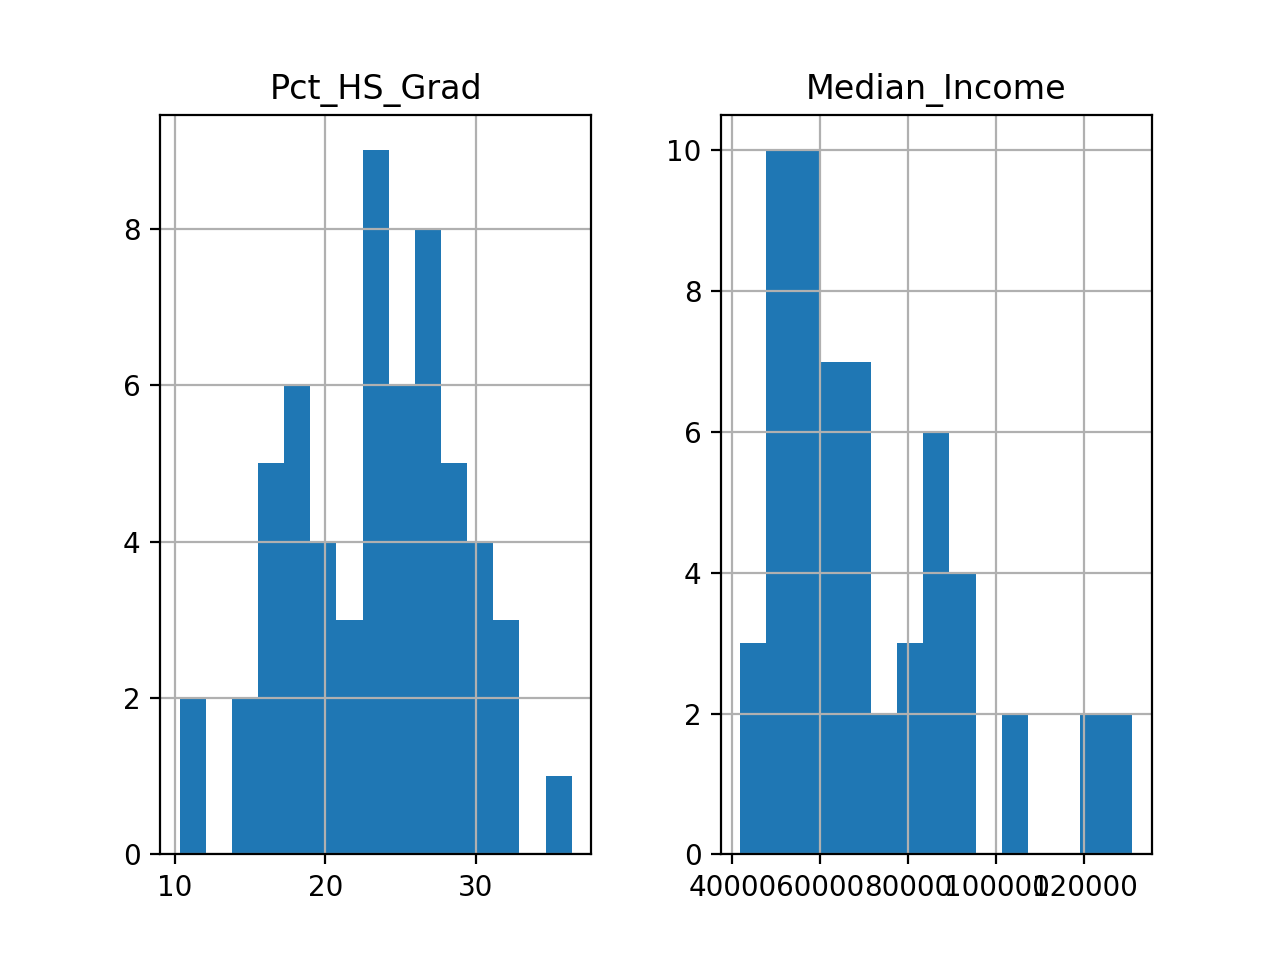

array([[<AxesSubplot:title={'center':'Pct_HS_Grad'}>,
        <AxesSubplot:title={'center':'Median_Income'}>]], dtype=object)

In [54]:
ca_df[['Pct_HS_Grad', 'Median_Income']].hist(bins=15)

<IPython.core.display.Javascript object>


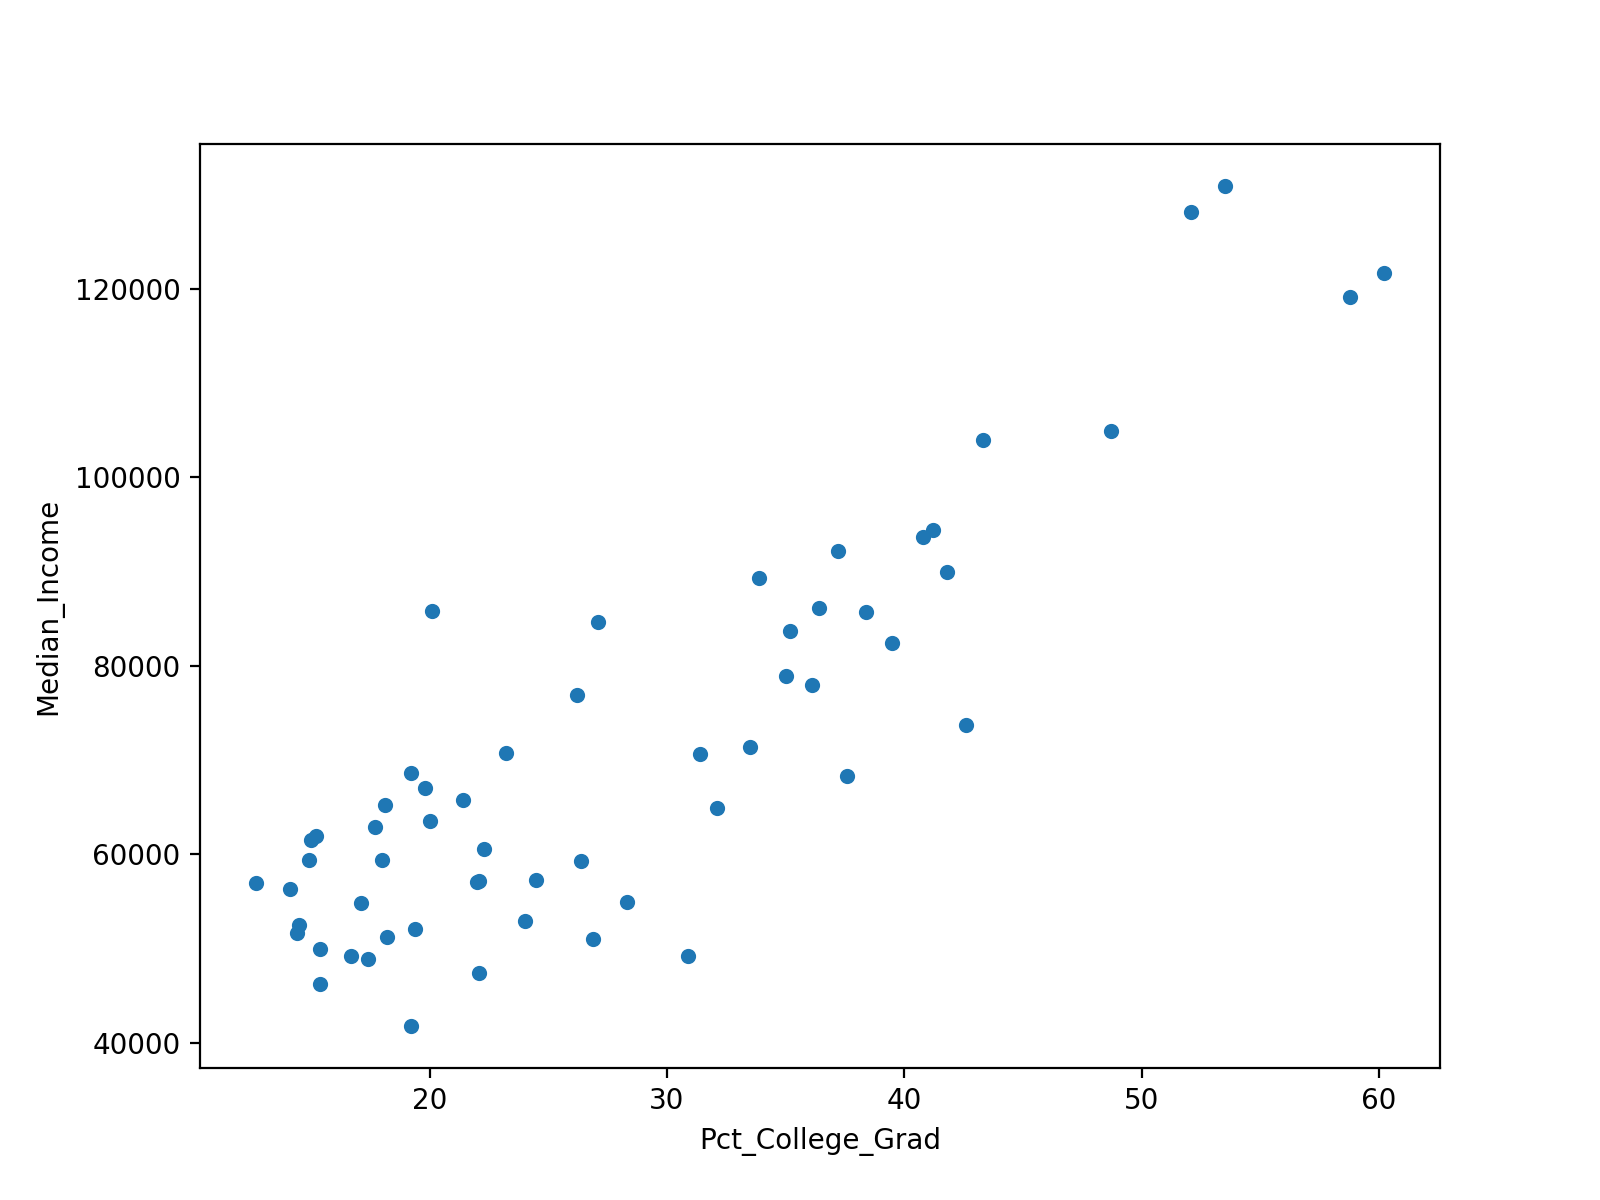

<AxesSubplot:xlabel='Pct_College_Grad', ylabel='Median_Income'>

In [55]:
f,ax = plt.subplots(figsize=(8,6))

ca_df.plot.scatter(
    x = 'Pct_College_Grad',
    y = 'Median_Income',
    ax = ax
)

<IPython.core.display.Javascript object>


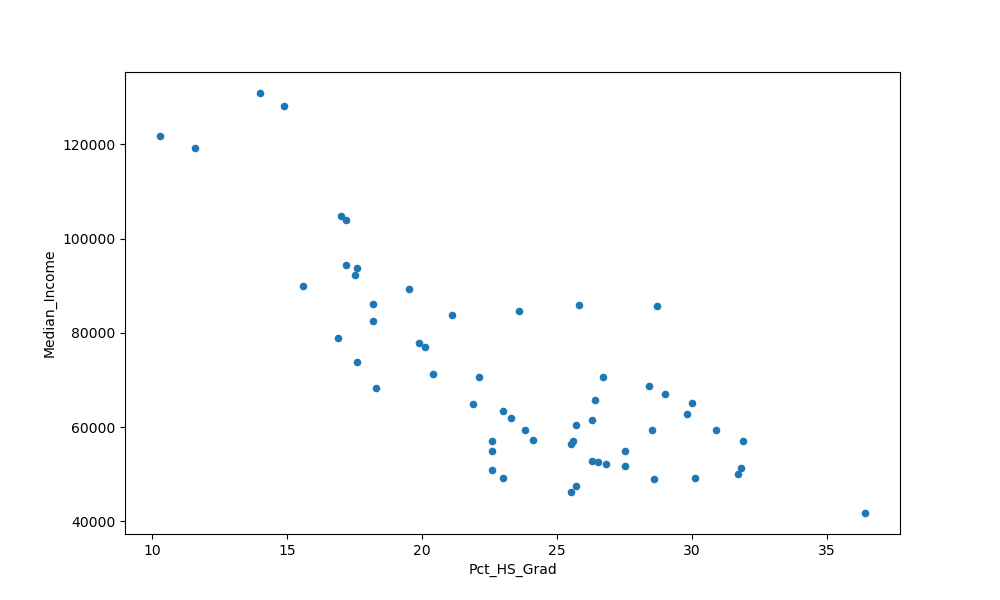

<AxesSubplot:xlabel='Pct_HS_Grad', ylabel='Median_Income'>

In [51]:
f,ax = plt.subplots(figsize=(10,6))

ca_df.plot.scatter(
    x = 'Pct_HS_Grad',
    y = 'Median_Income',
    ax = ax
)